# Chapter 9: Classification and Regression Trees

## Import Required Packages

In [1]:
# install dmba package
!pip install dmba

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Classification trees
# additional functions: RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from dmba import plotDecisionTree, classificationSummary

## Classification Tree

### Riding mowers data

In [3]:
# load data, RidingMowers.csv
# define mower_df and preview it
mower_df = pd.read_csv('RidingMowers.csv')
mower_df.head()



,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [4]:
# check info()

mower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     object 
dtypes: float64(2), object(1)
memory usage: 708.0+ bytes


In [5]:
# check columns

mower_df.columns

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

In [6]:
# use DecisionTreeClassifier()
# parameters within the parenthese constrain the growth of a tree
# random_state=1, max_depth=1
# define mower_tree

mower_tree = DecisionTreeClassifier(random_state=1, max_depth=1)
# define x and y, using the full data (small dataset)

x = mower_df[['Income', 'Lot_Size']]
y = mower_df.Ownership

# fit the classification tree with x and y
mower_tree.fit(x,y)

DecisionTreeClassifier(max_depth=1, random_state=1)

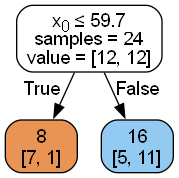

In [7]:
# plot the classification tree, plotDecisionTree()
# feature_names refer to the predictors
# class_names refer to the categories in the outcome variable, mower_tree.classes_
plotDecisionTree(mower_tree)

# if there is an error about Graphviz, try to install it (https://graphviz.org/download/), set the path for all users, then restart and try again

In [8]:
# check mower_tree.classes_
# The order of the values vector in the boxes is the same as mower_tree.classes_

mower_tree.classes_

array(['Nonowner', 'Owner'], dtype=object)

### Grow tree fully

In [9]:
# grow a classification tree without constraints
# DecisionTreeClassifier(), only random_state=1
# define mower_tree again and fit it with x and y

mower_tree= DecisionTreeClassifier(random_state=1)
mower_tree.fit(x,y)

DecisionTreeClassifier(random_state=1)

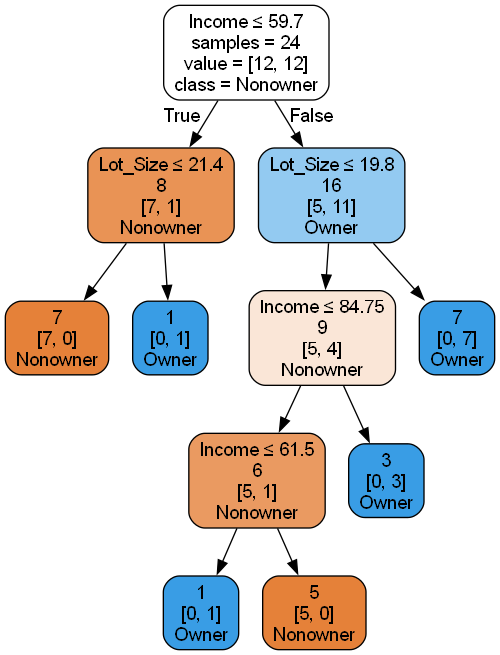

In [10]:
# plot the classification tree, plotDecisionTree()
# feature_names, x.columns
# class_names, mower_tree.classes_
plotDecisionTree(mower_tree,feature_names=x.columns, class_names=mower_tree.classes_)

# the terminal nodes have only one class at the end (no need to split anymore)

**---- Back to PPT ----**

## Performance and Overfitting

### Universal bank data

In [11]:
# load data, UniversalBank.csv
# define bank_df and preview it
bank_df= pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
# define x, by droping 3 columns, drop(), columns=['Personal Loan', 'ID', 'ZIP Code']
x= bank_df.drop(columns=['Personal Loan', 'ID','ZIP Code'])

# define y, Personal Loan

y=bank_df['Personal Loan']
# partition into training and validation datasets
# test_size=0.4, random_state=1

train_x, valid_x, train_y,valid_y= train_test_split(x,y, test_size=0.4, random_state=1)

In [13]:
# define bank_tree, DecisionTreeClassifier(), no parameters

bank_tree= DecisionTreeClassifier()
# fit it on the training dataset

bank_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [14]:
# check bank_tree.classes_
bank_tree.classes_



array([0, 1], dtype=int64)

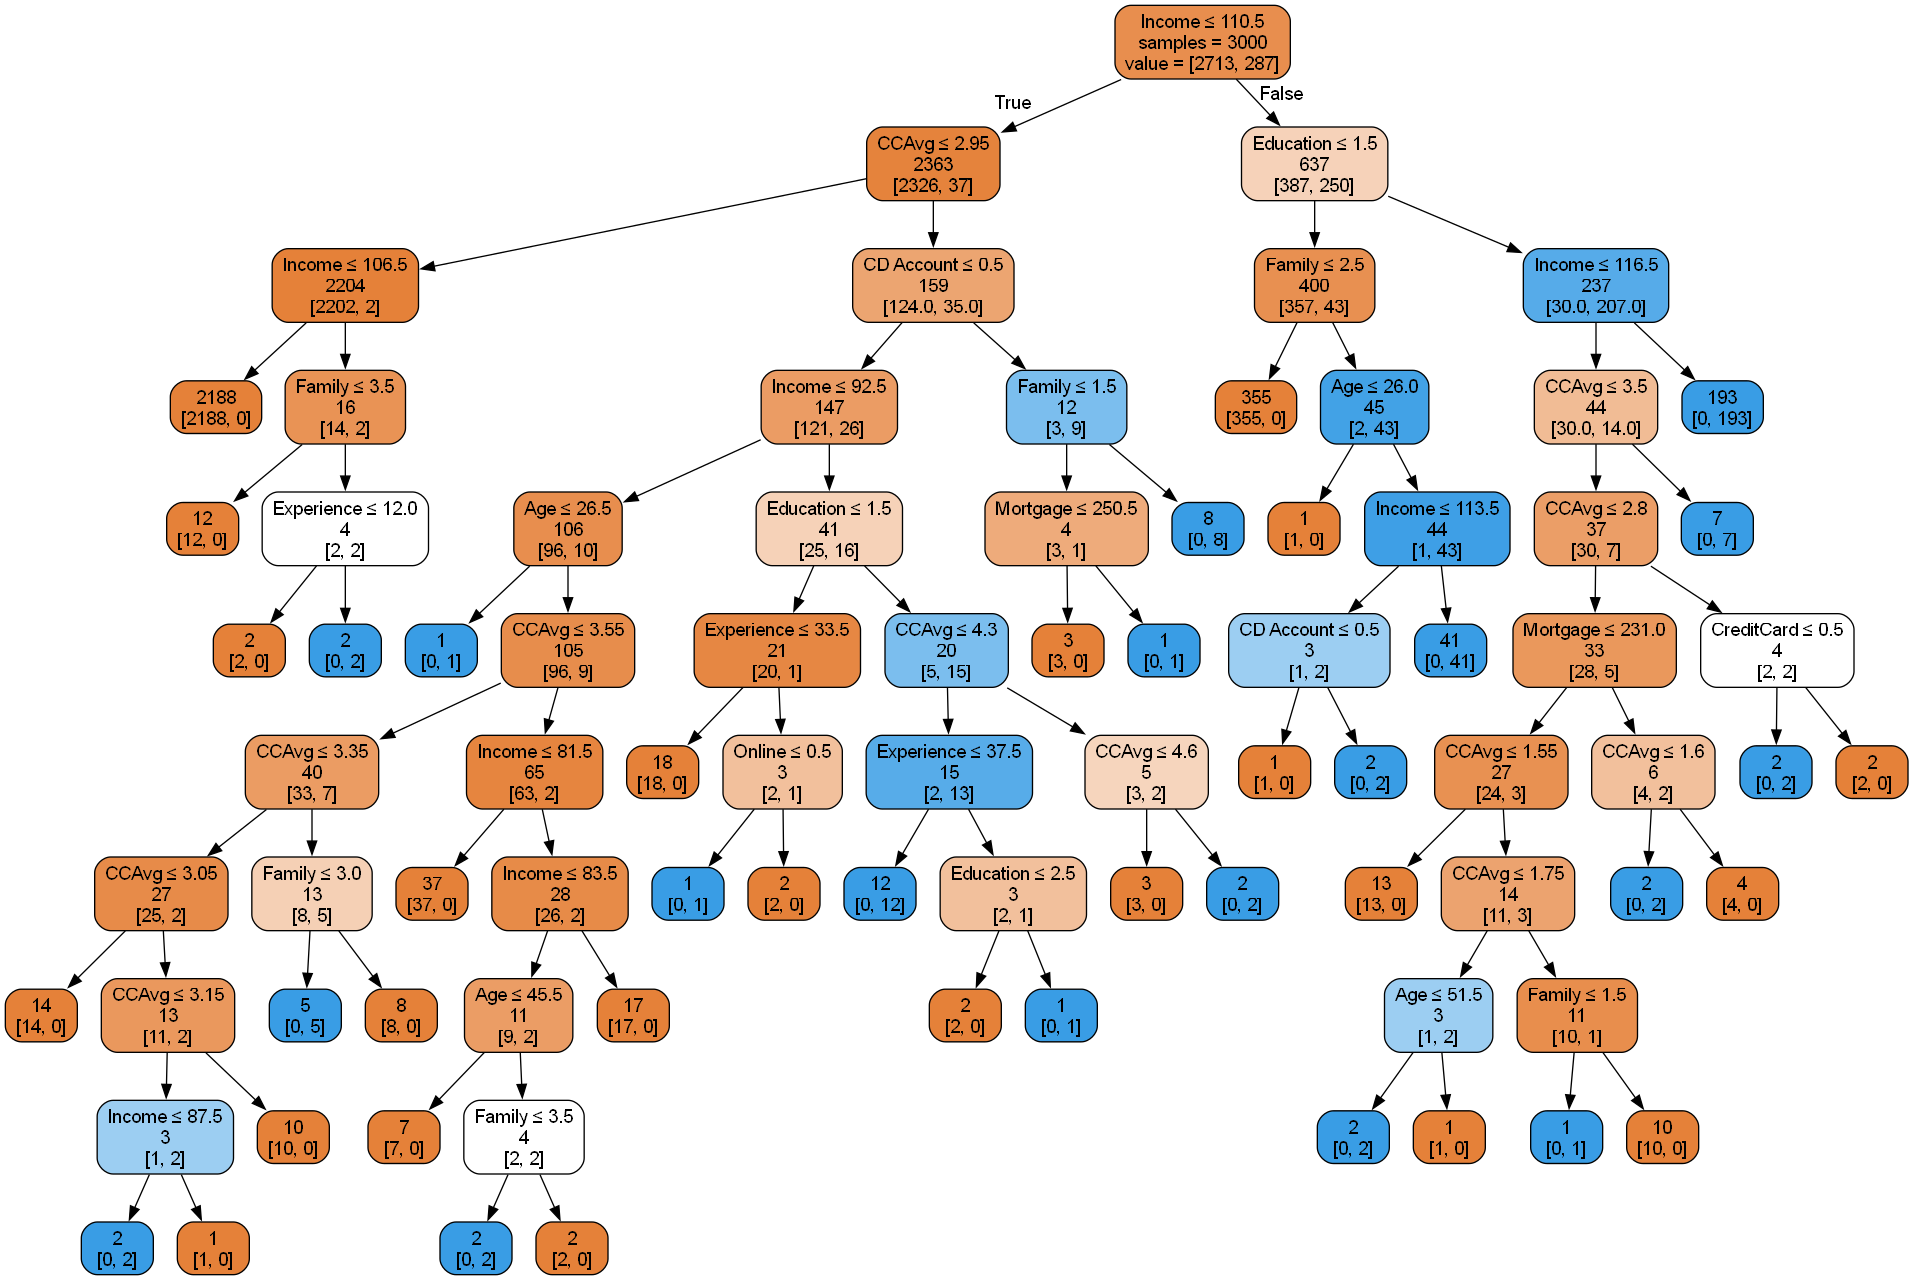

In [15]:
# plot the classification tree, plotDecisionTree(), just feature_names
plotDecisionTree(bank_tree,feature_names = train_x.columns)

# the color, orange is about 0 class, blue is about 1 class

### Confusion matrix

In [16]:
# confusion matrix for the training dataset
# classificationSummary(), actual y, predicted y (with predict())

classificationSummary(train_y, bank_tree.predict(train_x))
# accuracy rate is 100% !

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


In [17]:
# confusion matrix for the validation dataset

classificationSummary(valid_y, bank_tree.predict(valid_x))

Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1796   11
     1   26  167


### Limit tree growth

In [18]:
# min_samples_split, the minimum number of samples required to split an internal node
# min_impurity_decrease, a node will be split if this split induces a decrease 
# of the impurity greater than or equal to this value
# params: max_depth=30, min_samples_split=20, min_impurity_decrease=0.01
# define bank_smalltree

bank_smalltree = DecisionTreeClassifier(max_depth=30,
                                        min_samples_split=20,
                                        min_impurity_decrease=0.01)

# fit it on the training data

bank_smalltree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=30, min_impurity_decrease=0.01,
                       min_samples_split=20)

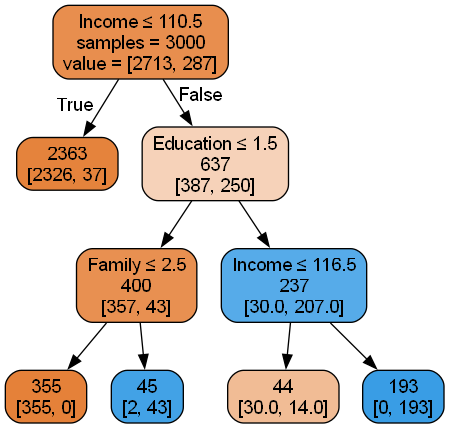

In [21]:
# plot the tree, indicate feature_names

plotDecisionTree(bank_smalltree, feature_names=train_x.columns)

In [22]:
# evaluate performance, classificationSummary(), training data

classificationSummary(train_y, bank_smalltree.predict(train_x))
# accuracy is not 100%

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236


In [23]:
# evaluate performance, validation data

classificationSummary(valid_y, bank_smalltree.predict(valid_x))

Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


**---- Back to PPT ----**

## Random Forest

### Universal bank data

In [24]:
# preview bank_df again

bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
# x, y and their training/validation subsets have already been defined
# random forest classifier, RandomForestClassifier()
# params: n_estimators=500, random_state=1
# define rf

rf = RandomForestClassifier(n_estimators=500, random_state=1)
# fit it with training dataset

rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

### Confusion matrix

In [28]:
# confusion matrix on validation dataset
# classificationSummary(), actual/predicted y

classificationSummary(valid_y, rf.predict(valid_x))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


### Variable importance

In [30]:
# for the fitted random forest classifier
# get the importances of the variables/features
# define importances, with rf.feature_importances_

importances = rf.feature_importances_

In [31]:
# check importances

importances

array([0.03625822, 0.0355389 , 0.33375616, 0.11137481, 0.1721052 ,
       0.20077164, 0.03424271, 0.00396363, 0.05791677, 0.0063938 ,
       0.00767817])

In [33]:
# create a new dataframe
# define df, 'feature' column: train_x.columns; 'importance' column: importances

df = pd.DataFrame({
    'Predictors': train_x.columns,
    'Importance Scores': importances
})

# sort the importance column, with sort_values('importance')
# update df
df = df.sort_values('Importance Scores')

# check df

df

,Predictors,Importance Scores
7,Securities Account,0.003964
9,Online,0.006394
10,CreditCard,0.007678
6,Mortgage,0.034243
1,Experience,0.035539
0,Age,0.036258
8,CD Account,0.057917
3,Family,0.111375
4,CCAvg,0.172105
5,Education,0.200772


In [34]:
df.columns

Index(['Predictors', 'Importance Scores'], dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Securities Account'),
  Text(1, 0, 'Online'),
  Text(2, 0, 'CreditCard'),
  Text(3, 0, 'Mortgage'),
  Text(4, 0, 'Experience'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'CD Account'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'CCAvg'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Income')])

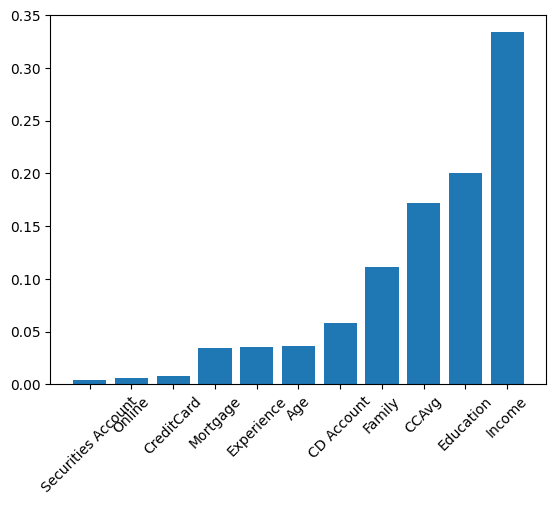

In [41]:
# plot a horizontal bar chart (bar vs. barh)
# use plt.barh()
# x as df.feature, y as df.importance

plt.bar(df['Predictors'], df['Importance Scores'])
plt.xticks(rotation=45)

**---- Back to PPT ----**